In [391]:
import pandas as pd 
import numpy as np 
import env as e
import prepare as pr
import acquire as ac
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import sklearn.metrics as met

# Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1)What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2)Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3)Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4)Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5)Run through steps 2-4 using a different max_depth value.

6)Which model performs better on your in-sample data?

7)Which model performs best on your out-of-sample data, the validate set?

In [286]:
df_titanic= ac.get_titanic_data()
df_titanic=pr.prep_titanic(df_titanic)
df_titanic.dropna(inplace=True)
df_titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [287]:
df_titanic= df_titanic.drop(columns=(['sex','embark_town']))

In [309]:
train, test = train_test_split(df_titanic, test_size=.2, random_state=123, stratify=df_titanic.survived)
train, val = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = val.drop(columns=['survived'])
y_val = val.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived
print(f'train_titanic -> {train.shape}')
print(f'validate_titanic -> {validate.shape}')
print(f'test_titanic -> {test.shape}')
baseline = train.survived.mean()
print(baseline)

train_titanic -> (497, 10)
validate_titanic -> (214, 10)
test_titanic -> (178, 10)
0.3822937625754527


In [289]:
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             889 non-null    int64  
 1   survived                 889 non-null    int64  
 2   pclass                   889 non-null    int64  
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   alone                    889 non-null    int64  
 7   sex_male                 889 non-null    uint8  
 8   embark_town_Queenstown   889 non-null    uint8  
 9   embark_town_Southampton  889 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 58.2 KB


[Text(0.5, 0.8333333333333334, 'sex_male <= 0.5\ngini = 0.472\nsamples = 497\nvalue = [307, 190]\nclass = d'),
 Text(0.25, 0.5, 'pclass <= 2.5\ngini = 0.376\nsamples = 167\nvalue = [42, 125]\nclass = a'),
 Text(0.125, 0.16666666666666666, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = a'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 73\nvalue = [38, 35]\nclass = d'),
 Text(0.75, 0.5, 'pclass <= 1.5\ngini = 0.316\nsamples = 330\nvalue = [265, 65]\nclass = d'),
 Text(0.625, 0.16666666666666666, 'gini = 0.482\nsamples = 74\nvalue = [44, 30]\nclass = d'),
 Text(0.875, 0.16666666666666666, 'gini = 0.236\nsamples = 256\nvalue = [221, 35]\nclass = d')]

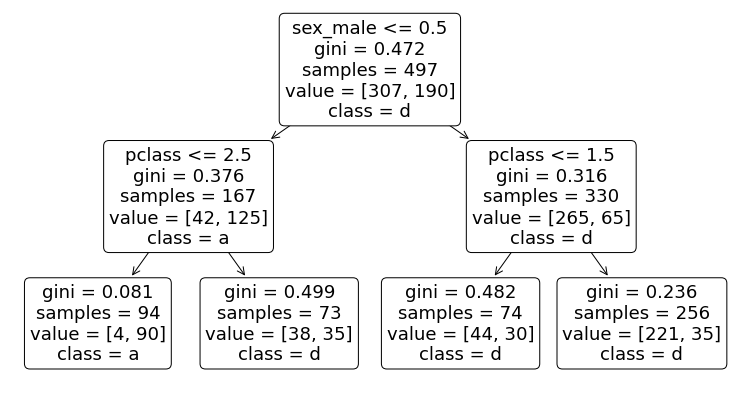

In [290]:
plt.figure(figsize=(13, 7))
clf1 = clf1.fit(X_train, y_train)
plot_tree(clf1, feature_names=X_train.columns.tolist(), class_names=['d','a'], rounded=True)

In [292]:
y_pred = clf.predict(X_train)
print(f'training score: {clf1.score(X_train, y_train):.2%}')
y_pred[0:5]

training score: 79.07%


array(['0', '1', '0', '1', '1'], dtype=object)

In [293]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.60465116, 0.39534884],
       [0.        , 1.        ],
       [0.91304348, 0.08695652],
       [0.        , 1.        ],
       [0.13333333, 0.86666667]])

In [294]:
#males and females
y_train.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [310]:
TP = ((train.survived == 1) & (clf.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (clf.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (clf.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (clf.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, clf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, clf1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, clf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, clf.predict(X_train)):.2%}')
print(f'support: {clf.predict(X_train).sum()}')

accuracy: 84.51%
true positive rate / recall: 47.37%
true negative rate / Specificity: 92.18%
false potivie rate / Percision: 85.09%
false negative rate: 84.23%
f1-score: 78.06%
support: 161


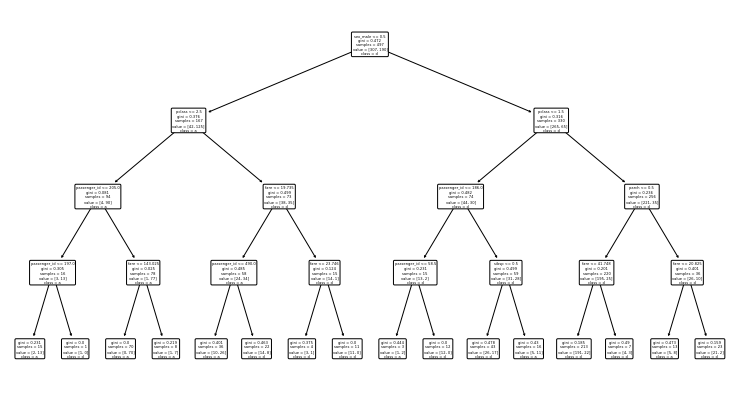

In [299]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
plt.figure(figsize=(13, 7))
clf = clf.fit(X_train, y_train)
plot_tree(clf, feature_names=X_train.columns.tolist(),class_names=['d','a'], rounded=True)
plt.show()

In [300]:
print(f'training score: {clf.score(X_train, y_train):.2%}')

training score: 84.51%


In [301]:
pd.DataFrame(met.classification_report(train.survived, clf1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.751861,0.957447,0.790744,0.854654,0.830455
recall,0.986971,0.473684,0.790744,0.730327,0.790744
f1-score,0.853521,0.633803,0.790744,0.743662,0.769524
support,307.000000,190.000000,0.790744,497.000000,497.000000


In [318]:
print(f'CLF Accuracy: {met.accuracy_score(train.survived, clf.predict(X_train)):.2%}')
print(f'CLF-1 Accuracy: {met.accuracy_score(train.survived, clf1.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.survived, baseline_train):.2%}')
#model CLF perform the best out of all the models

CLF Accuracy: 84.51%
CLF-1 Accuracy: 79.07%
Baseline Accuracy: 0.00%


In [319]:
# Which model performs better on your in-sample data?
# CLD-1 was the most accuracy
print(f'CLF Accuracy: {met.accuracy_score(val.survived, clf.predict(X_val)):.2%}')
print(f'CLF-1 Accuracy: {met.accuracy_score(val.survived, clf1.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.survived, baseline_val):.2%}')

CLF Accuracy: 74.30%
CLF-1 Accuracy: 78.04%
Baseline Accuracy: 0.00%


# Exercises- random forest 

Continue working in your model file with titanic data to do the following:

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


A-the sample size of 5 with depth of 5 perform worse the more deep and less sample 

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [396]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       307
           1       1.00      0.91      0.95       190

    accuracy                           0.97       497
   macro avg       0.97      0.96      0.96       497
weighted avg       0.97      0.97      0.97       497

[[307   0]
 [ 17 173]]


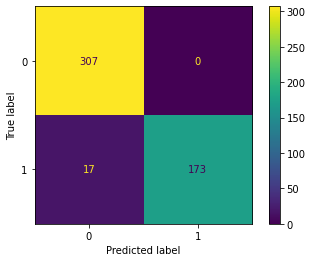

In [397]:
cm = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [399]:
TP = ((train.survived == 1) & (rf.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (rf.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (rf.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (rf.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, rf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, rf.predict(X_train)):.2%}')
print(f'support: {rf.predict(X_train).sum()}')

accuracy: 96.58%
true positive rate / recall: 91.05%
true negative rate / Specificity: 100.00%
false potivie rate / Percision: 100.00%
false negative rate: 94.75%
f1-score: 95.32%
support: 173


# Randomforestclassifier(2)

In [393]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)
# samples 5 and depth 5 with a percent chance of 85 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.85


In [394]:
TP = ((train.survived == 1) & (rf.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (rf.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (rf.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (rf.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, rf.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, rf.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, rf.predict(X_train)):.2%}')
print(f'support: {rf.predict(X_train).sum()}')

accuracy: 84.51%
true positive rate / recall: 70.00%
true negative rate / Specificity: 93.49%
false potivie rate / Percision: 86.93%
false negative rate: 83.43%
f1-score: 77.55%
support: 153


              precision    recall  f1-score   support

           0       0.83      0.93      0.88       307
           1       0.87      0.70      0.78       190

    accuracy                           0.85       497
   macro avg       0.85      0.82      0.83       497
weighted avg       0.85      0.85      0.84       497

[[287  20]
 [ 57 133]]


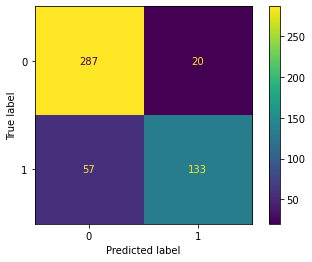

In [395]:
cm = confusion_matrix(y_train, y_pred)
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

# K-Nearest Neighbor
Exercises

Continue working in your model file with the titanic dataset.

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through setps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

----KNN 2 perform better cause more neightbors so better accuracy and best result.

Which model performs best on our out-of-sample data from validate?

----both KNN perform the same ???

In [402]:
from sklearn.neighbors import KNeighborsClassifier

In [459]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [460]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [461]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.71
[[279  28]
 [118  72]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       307
           1       0.72      0.38      0.50       190

    accuracy                           0.71       497
   macro avg       0.71      0.64      0.64       497
weighted avg       0.71      0.71      0.68       497



In [462]:
TP = ((train.survived == 1) & (knn.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (knn.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (knn.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (knn.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn.predict(X_train)):.2%}')
print(f'support: {knn.predict(X_train).sum()}')

accuracy: 70.62%
true positive rate / recall: 37.89%
true negative rate / Specificity: 90.88%
false potivie rate / Percision: 72.00%
false negative rate: 70.28%
f1-score: 49.66%
support: 100


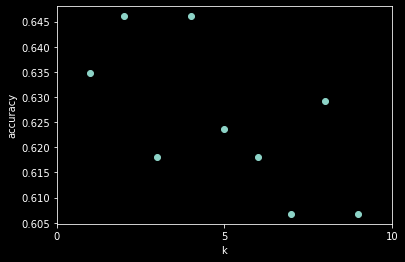

In [473]:
import matplotlib.pyplot as plt
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.style.use('dark_background')
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10])
plt.show()


In [464]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.68


# knn(2)

In [465]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [466]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [467]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.68
[[281  26]
 [133  57]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       307
           1       0.69      0.30      0.42       190

    accuracy                           0.68       497
   macro avg       0.68      0.61      0.60       497
weighted avg       0.68      0.68      0.64       497



In [468]:
TP = ((train.survived == 1) & (knn.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (knn.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (knn.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (knn.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, knn.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, knn.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, knn.predict(X_train)):.2%}')
print(f'support: {knn.predict(X_train).sum()}')

accuracy: 68.01%
true positive rate / recall: 30.00%
true negative rate / Specificity: 91.53%
false potivie rate / Percision: 68.67%
false negative rate: 67.87%
f1-score: 41.76%
support: 83


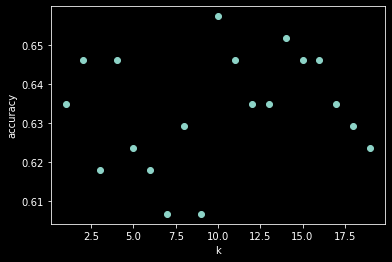

In [474]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.style.use('dark_background')
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.show()

In [471]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on test set: 0.68
